In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

pd.set_option('display.float_format', '{:.4f}'.format)
%precision 4
%config InlineBackend.figure_format = 'retina'

import pandas_datareader as pdr
import requests_cache
session = requests_cache.CachedSession(expire_after='1D')

We can use `()` and `.assign()` to modify the Fama-French data in chained command.

In [2]:
ff = (
    pdr.get_data_famafrench(
        symbols='F-F_Research_Data_Factors', # get monthly FF factors
        start='1900', # return all available data
        session=session # use my cache file to reduce downloads
    )[0] # slice the factor data frame
    .div(100) # convert it to decimals
    .assign(Mkt = lambda x: x['Mkt-RF'] + x['RF']) # calculate market return
    [['Mkt', 'RF']] # slice only market return and risk-free rate
)

What is the cumulative value of $1000 invested in `Mkt` at the start of the Fama-French data?

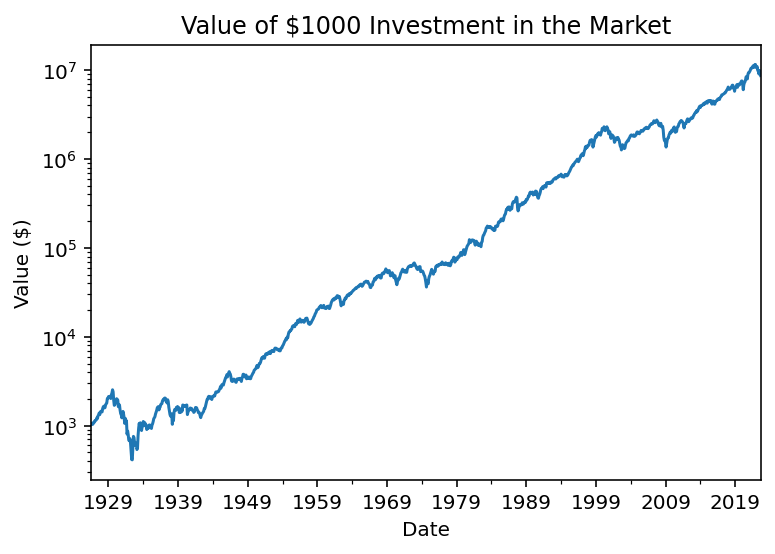

In [3]:
ff['Mkt'].add(1).cumprod().mul(1000).plot()
plt.ylabel('Value ($)')
plt.title('Value of $1000 Investment in the Market')
plt.semilogy()
plt.show()

What is the cumulative value of $1000 invested in `Mkt` at the start of *every month*?

In [4]:
for date, (mkt, rf) in ff[['Mkt', 'RF']].iterrows(): # loop down the data frame of market returns
    if date == ff.index[0]:
        dca_bgn = 0
        ff['dca_end'] = np.nan # not strictly necessary
    dca_end = (dca_bgn + 1_000) * (1 + mkt)
    ff.loc[date, 'dca_end'] = dca_end
    dca_bgn = dca_end

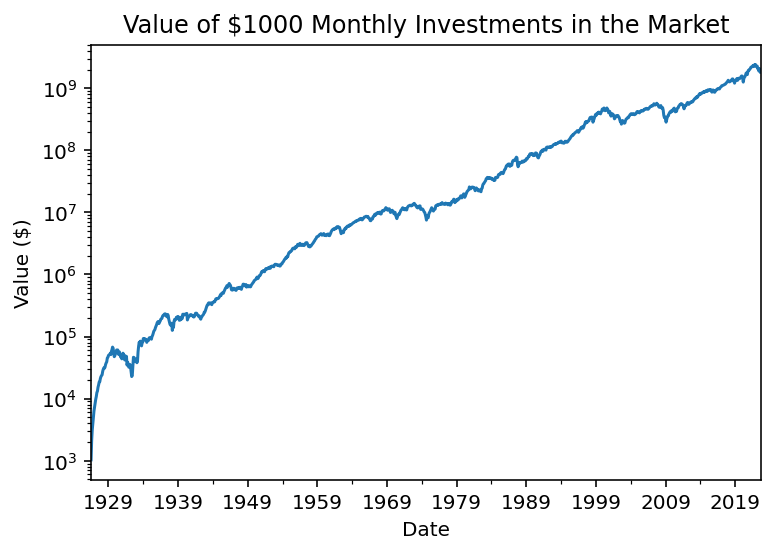

In [5]:
ff['dca_end'].plot()
plt.ylabel('Value ($)')
plt.title('Value of $1000 Monthly Investments in the Market')
plt.semilogy()
plt.show()

# Consider only 1999 through today

# Can you find a period that reverses your question 1 conclusion?

# Consider all full years from 1927 through 2021

# Consider all available 20-year holding periods

# Which investing strategy is better overall, LS or DCA?